# Задача №4

> Файл `youtube_4.csv` содержит следующие сведения о видеороликах на YouTube (по сто роликов на каждый вариант):

> n — номер наблюдения,  
> id — идентификатор ролика,  
> framerate — число кадров в секунду,  
> frames — общее число кадров в видео,  
> bitrate — битрейт, Кбит/сек.  
> duration — продолжительность, сек.  
> size — размер видеофайла, байт.  

> Для признаков framerate, frames, bitrate, duration и size рассчитайте две корреляционные
матрицы — на основании коэффициентов Пирсона и Спирмена. Оцените значимость каждого
коэффициента (проверьте гипотезу об отсутствии корреляции) и представьте полученные
результаты в виде таблицы



Сначало нам надо прочитать данные из `csv` файла.
Для этого мы используем библиотеку `pandas`.
В нашем файле уже есть колонка с индексами и поэтому мы передаём `index_col=0`, чтобы `pandas` их заново не считал.
Мы также можем удалить `id`, так как он нам не нужен.
`pandas` считывает все данные в свой немного странный тип `DataFrame`, с которым немного сложно работать, потому что он иногда ведёт себя, как будто он readonly. 

In [169]:
import pandas as pd

data = pd.read_csv("youtube_4.csv", index_col=0)
data = data.drop(columns=['id'])

# Коэффициенты Пирсона

$$ \mathbf{r}_{XY} = \frac{\sum (X-\bar{X})(Y-\bar{Y})}{\sqrt{\sum (X-\bar{X})^2\sum (Y-\bar{Y})^2}} $$

Статистика:
$$ t = \dfrac{\mathbf{r}_{XY}\sqrt{n-2}}{\sqrt{1-\mathbf{r}_{XY}^2}} \sim t_{n-1} $$

In [170]:
import numpy as np

def PearsonCoefficient(X, Y):
    Xbar = sum(X)/len(X)
    Ybar = sum(Y)/len(Y)
    return sum((X - Xbar)*(Y - Ybar))/(sum((X-Xbar)**2) * sum((Y-Ybar)**2))**.5

def nparr(colname):
    return np.array(list(data[colname]), dtype=np.float64)

# Коэффициенты Спирмена

> Это тот же коэффициент Пирсона, но применённый к рангам:

$$ \mathbf{r}^S_{XY} = \mathbf{r}_{\operatorname{rank}(x),\,\operatorname{rank}(y)} $$

Статистика для них ровно такая же.

In [171]:
from scipy.stats import rankdata

def SpearmanCoefficient(colname1, colname2):
    return PearsonCoefficient(rankdata(nparr(colname1)), rankdata(nparr(colname2)))

# Таблички

> Таблица должна быть оформлена ИМЕННО ТАК.

`pandas` плохо умеет выводить таблицы в `latex`, и поэтому приходится писать для этого свой код, чтобы получилось «ИМЕННО ТАК»

In [172]:
from IPython.display import display, Latex
from scipy.stats import t

def printTable(name, table, n=100):
    colformat = '|r|' + '|'.join(['l']*len(table.columns)) + '|'
    res = r"\begin{center} %s \\ \begin{tabular}{%s}\hline {$\displaystyle\vphantom{\sum}$}" % (name, colformat)
    
    for col in table.columns:
        res += r" & \textbf{%s} " % col
    res += r" \\\hline " + '\n'

    for row in table.index:
        res += r"\textbf{%s}" % row
        for col in table.columns:
            val = table.loc[row,col]
            count = 0
            if val != 1 and n > 2:
                tval = 1 - float(t.cdf(val*(n-2)**.5/(1-val**2)**.5, n-2))
                count = (tval < 0.001) + (tval < 0.01) + (tval < 0.05)
            res += " & $%.2f$ %s " % (val, '*'*count)
        res += r" \\\hline " + '\n'
    
    res += r"\end{tabular}\end{center}"
    display(Latex(res))

# Табличка Пирсона

In [173]:
res = pd.DataFrame(index=data.columns, columns=data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        res[col1][col2] = PearsonCoefficient(nparr(col1), nparr(col2))
printTable("Коэффициенты корреляции Пирсона.", res)

<IPython.core.display.Latex object>

# Табличка Спирмена

In [174]:
res2 = pd.DataFrame(index=data.columns, columns=data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        res2[col1][col2] = SpearmanCoefficient(col1, col2)
printTable("Коэффициенты корреляции Спирмена.", res2)

<IPython.core.display.Latex object>

# Сравнение коэффицентов

> Сравните коэффициенты Пирсона и Спирмена, обратите внимание на случаи, когда два этих
коэффициента существенно расходятся, если такие есть. Что такое «существенно», решайте
сами. В случае существенного расхождения постройте диаграммы разброса для тех пар
признаков, тесноту связи между которыми коэффициенты измеряют по-разному, и
попытайтесь объяснить причину расхождения.

> Если вы не видите никаких существенных расхождений между двумя матрицами, просто
постройте диаграмму рассеяния для случая, где разность коэффициентов Пирсона и
Спирмена наибольшая.


In [175]:
printTable("Разность коэффициентов Спирмена и Пирсона.", res2 - res, 0)

<IPython.core.display.Latex object>

# Диаграммы разбросов

In [182]:
import matplotlib.pyplot as plt

def scatter(colname1, colname2):
    plt.scatter(data[colname1], data[colname2], s=2) # ставим размер 2 чтобы точки не сливались в синий суп
    plt.xlabel(colname1)
    plt.ylabel(colname2)
    plt.title(f"Диаграмма разброса для {colname1} и {colname2}")
    plt.show()

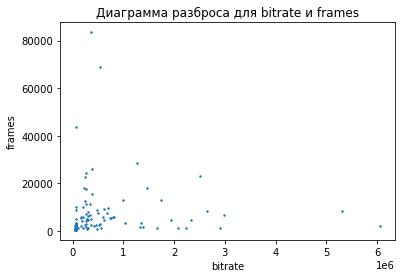

In [183]:
scatter("bitrate", "frames")

Тут разница коэффициентов объясняется тем, что эти точки распределены по нескольким радиальным линиям положительной корреляции, по одной линии для каждого framerate-а.
Коэффициент Пирсона не замечает такую зависимость и говорит что корреляции нет, а коэффициент Спирмена её видит.
Так что можно сказать что коэффициент Спирмена тут более прав.

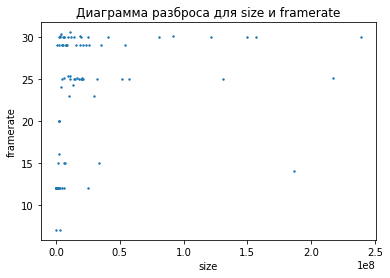

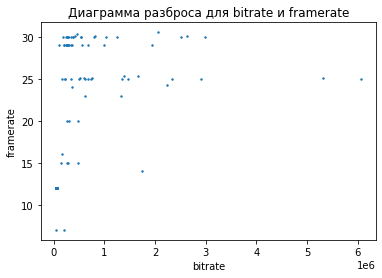

In [184]:
scatter("size", "framerate")
scatter("bitrate", "framerate")

На этих двух диаграммах разность коэффициентов тоже вызвана дискретностью framerate-а, но более напрямую.